# **Final Project Task 5 - Census Modeling NN Regression**

Requirements

- Create a NN regression model on the Census dataset, with 'hours-per-week' target

- Model Selection and Setup:
    - Build a neural network model using a deep learning library like TensorFlow, Keras or PyTorch.
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - Train a simple NN model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable.
    - Feature Selection:
        - Neural Networks can learn feature importance automatically, so all relevant features should be included rather than manually selecting a subset.
        - Consider using embeddings for high-cardinality categorical features instead of one-hot encoding to improve efficiency.
    - Experimentation:
        - Focus on preprocessing techniques rather than manually selecting feature combinations. Ensure numerical features are normalized (e.g., MinMaxScaler, StandardScaler) and categorical features are properly encoded (e.g., one-hot encoding or embeddings for high-cardinality variables).
        - Experiment with different neural network architectures (e.g., number of layers, neurons per layer) and hyperparameters (e.g., activation functions, learning rates, dropout rates, and batch sizes).
        - Use techniques such as early stopping and learning rate scheduling to optimize model performance and prevent overfitting.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [33]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/332.0 MB 9.7 MB/s eta 0:00:35
   ---------------------------------------- 3.1/332.0 MB 8.8 MB/s eta 0:00:38
    --------------------------------------- 4.2/332.0 MB 7.3 MB/s eta 0:00:46
    --------------------------------------- 5.0/332.0 MB 6.4 MB/s eta 0:00:51
    --------------------------------------- 6.0/332.0 MB 5.9 MB/s eta 0:00:56
    --------------------------------------- 6.8/332.0 MB 5.7 MB/s eta 0:00:58
    --------------------------------------- 7.6/332.0 MB 5.4 MB/s eta 0:01:00
    --------------------------------------- 8.1/332.0 MB 5.1 MB/s eta 0:01:04
   - -------------------------------------- 8.4/332.0 MB 4.6 MB/s eta 0:01:11
   - -------------------------------------- 8.7/332.0 MB 4.4 MB/s eta 0

In [68]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [82]:
import sys
print(sys.version)
print(sys.executable)


3.13.12 (tags/v3.13.12:1cbe481, Feb  3 2026, 18:22:25) [MSC v.1944 64 bit (AMD64)]
C:\Users\valer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe


In [84]:
import sys
!{sys.executable} -m pip install torch


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/113.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/113.8 MB 472.4 kB/s eta 0:04:00
   ---------------------------------------- 0.5/113.8 MB 472.4 kB/s eta 0:04:00
   ---------------------------------------- 0.8/113.8 MB 533.9 kB/s eta 0:03:32
   ---------------------------------------- 0.8/113.8 MB 533.9 kB/s eta 0:03:32
   ---------------------------------------- 0.8/113.8 MB 533.9 kB/s eta 0:03:32
   ---------------------------------------- 0.8/113.8 MB 533.9 kB/s eta 0:03:32
   ---------------------------------------- 1.0/113.8 MB 462.7 kB/s eta 0:04:04
   ----

### Importuri + setup

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

In [86]:
import pandas as pd

# Load preprocessed data from Task 1
train_df = pd.read_csv("test_preprocessed.csv")
test_df  = pd.read_csv("train_preprocessed.csv")
    
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

display(train_df.head(3))

Train shape: (6508, 122)
Test shape : (26029, 122)


,age,fnlwgt,education-num,capital-gain,capital-loss,capital_net,capital_gain_log,capital_loss_log,has_capital,is_married,...,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K,age_bin_25-34,age_bin_35-44,age_bin_45-59,age_bin_60+,age_bin_<25,hours-per-week
0,-0.557141,-1.619320,0.355672,0.0,0.0,0.0,0.0,0.0,0.0,1.059838,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40
1,-1.073840,-0.596512,1.169686,0.0,0.0,0.0,0.0,0.0,0.0,-0.943541,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,40
2,1.583469,-0.935084,-0.051335,0.0,0.0,0.0,0.0,0.0,0.0,1.059838,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,60


In [100]:

TARGET = "hours-per-week"

X_train_full = train_df.drop(columns=[TARGET]).to_numpy().astype(np.float32)
y_train_full = train_df[TARGET].to_numpy().astype(np.float32)

X_test = test_df.drop(columns=[TARGET]).to_numpy().astype(np.float32)
y_test = test_df[TARGET].to_numpy().astype(np.float32)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=SEED
)

X_train.shape, X_val.shape, X_test.shape


((5206, 121), (1302, 121), (26029, 121))

In [101]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

**Observati**: În această etapă sunt importate bibliotecile necesare pentru procesarea datelor, construirea modelului de regresie și evaluarea performanței.

- numpy este utilizat pentru operații numerice eficiente.

- pandas este folosit pentru manipularea seturilor de date.

- scikit-learn este utilizat pentru împărțirea datelor și calculul metricilor de evaluare.

TensorFlow / Keras este biblioteca aleasă pentru construirea și antrenarea modelului de Neural Network.

### Load data (preprocessed) + split train/val/test
Variabila țintă a problemei de regresie este definită ca hours-per-week, reprezentând numărul de ore lucrate pe săptămână.

In [148]:
TARGET = "hours-per-week"

X_train_full = train_df.drop(columns=[TARGET]).to_numpy().astype(np.float32)
y_train_full = train_df[TARGET].to_numpy().astype(np.float32)

X_test = test_df.drop(columns=[TARGET]).to_numpy().astype(np.float32)
y_test = test_df[TARGET].to_numpy().astype(np.float32)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=SEED
)

X_train.shape, X_val.shape, X_test.shape

((5206, 121), (1302, 121), (26029, 121))

**Observati**: Dimensiunile finale ale seturilor de date sunt:

Train: 5206 observații × 121 features

Validation: 1302 observații × 121 features

Test: 26029 observații × 121 features

### DataLoaders

In [121]:
BATCH_SIZE = 256

train_loader = DataLoader(
    TensorDataset(torch.tensor(X_train), torch.tensor(y_train).unsqueeze(1)),
    batch_size=BATCH_SIZE, shuffle=True
)
val_loader = DataLoader(
    TensorDataset(torch.tensor(X_val), torch.tensor(y_val).unsqueeze(1)),
    batch_size=BATCH_SIZE, shuffle=False
)
test_loader = DataLoader(
    TensorDataset(torch.tensor(X_test), torch.tensor(y_test).unsqueeze(1)),
    batch_size=BATCH_SIZE, shuffle=False
)


### Baseline Neural Network

In [129]:
class BaselineNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BaselineNN(input_dim=X_train.shape[1]).to(device)

model

BaselineNN(
  (net): Sequential(
    (0): Linear(in_features=121, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

**Observatii**: A fost construit un Neural Network de bază (baseline) pentru problema de regresie, utilizat ca punct de referință pentru experimentele ulterioare.

Arhitectura modelului este un Multi-Layer Perceptron (MLP) cu:

- un strat de intrare corespunzător celor 121 de variabile explicative,

- două straturi ascunse cu 64 și 32 neuroni,

- un strat de ieșire cu un singur neuron, specific problemelor de regresie.

Funcția de activare ReLU este utilizată în straturile ascunse pentru a introduce non-liniaritate și pentru a facilita o convergență mai rapidă în timpul antrenării.

Stratul de ieșire nu utilizează o funcție de activare, permițând modelului să producă valori continue pentru variabila țintă (hours-per-week).

### Loss + optimizer (Alege Huber / MSE / MAE)

In [131]:
loss_fn = nn.SmoothL1Loss()  # Huber-like
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### Train loop + log (train/val loss + MAE per epoch)

In [136]:
def evaluate(model, loader):
    model.eval()
    all_preds, all_true = [], []
    total_loss = 0.0
    n = 0

    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = loss_fn(preds, yb)
            total_loss += loss.item() * xb.size(0)
            n += xb.size(0)

            all_preds.append(preds.cpu().numpy())
            all_true.append(yb.cpu().numpy())

    y_pred = np.vstack(all_preds).ravel()
    y_true = np.vstack(all_true).ravel()
    mae = mean_absolute_error(y_true, y_pred)
    return total_loss / n, mae

EPOCHS = 30

train_losses, val_losses = [], []
train_maes, val_maes = [], []

for epoch in range(1, EPOCHS + 1):
    model.train()
    running_loss = 0.0
    n = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        preds = model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * xb.size(0)
        n += xb.size(0)

    train_loss_epoch = running_loss / n
    val_loss_epoch, val_mae_epoch = evaluate(model, val_loader)

    # train MAE (calc on whole train set)
    train_loss_eval, train_mae_epoch = evaluate(model, train_loader)

    train_losses.append(train_loss_epoch)
    val_losses.append(val_loss_epoch)
    train_maes.append(train_mae_epoch)
    val_maes.append(val_mae_epoch)

    print(f"Epoch {epoch:02d} | train_loss={train_loss_epoch:.4f} | val_loss={val_loss_epoch:.4f} | val_mae={val_mae_epoch:.4f}")

Epoch 01 | train_loss=39.8072 | val_loss=39.4039 | val_mae=39.9038
Epoch 02 | train_loss=38.7765 | val_loss=37.4614 | val_mae=37.9613
Epoch 03 | train_loss=35.2661 | val_loss=31.5326 | val_mae=32.0316
Epoch 04 | train_loss=26.3349 | val_loss=18.8063 | val_mae=19.3051
Epoch 05 | train_loss=11.7478 | val_loss=8.6075 | val_mae=9.0937
Epoch 06 | train_loss=7.7333 | val_loss=7.5148 | val_mae=7.9873
Epoch 07 | train_loss=6.9930 | val_loss=7.2194 | val_mae=7.6883
Epoch 08 | train_loss=6.8638 | val_loss=7.1912 | val_mae=7.6569
Epoch 09 | train_loss=6.8268 | val_loss=7.1754 | val_mae=7.6418
Epoch 10 | train_loss=6.8068 | val_loss=7.1603 | val_mae=7.6261
Epoch 11 | train_loss=6.7912 | val_loss=7.1496 | val_mae=7.6169
Epoch 12 | train_loss=6.7765 | val_loss=7.1435 | val_mae=7.6111
Epoch 13 | train_loss=6.7710 | val_loss=7.1416 | val_mae=7.6082
Epoch 14 | train_loss=6.7566 | val_loss=7.1305 | val_mae=7.5982
Epoch 15 | train_loss=6.7448 | val_loss=7.1257 | val_mae=7.5952
Epoch 16 | train_loss=6.734

**Observati**: Evoluția loss-ului arată o scădere consistentă atât pe setul de train, cât și pe setul de validation, ceea ce indică faptul că modelul învață relații relevante din date.

MAE pe setul de validation scade rapid în primele epoci (de la valori peste 30), apoi se stabilizează în jurul valorii de ~7.5 ore, sugerând o bună capacitate de generalizare.

Diferența relativ mică dintre training loss și validation loss indică faptul că modelul nu suferă de overfitting semnificativ în configurația actuală.

### Ploturi

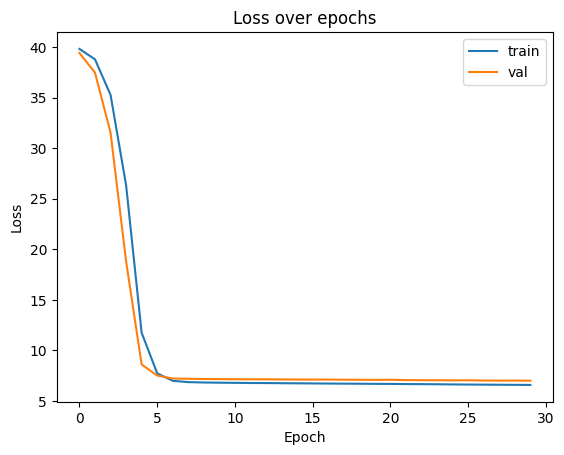

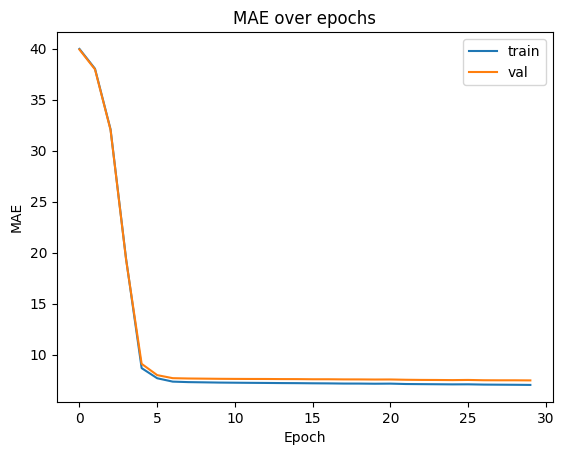

In [140]:
plt.figure()
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

plt.figure()
plt.plot(train_maes)
plt.plot(val_maes)
plt.title("MAE over epochs")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend(["train", "val"])
plt.show()



**Observati**: Graficele prezintă evoluția loss-ului și a Mean Absolute Error (MAE) pe parcursul epocilor, atât pentru setul de train, cât și pentru setul de validation.
Curbele de training și validation loss urmează o evoluție similară și rămân apropiate pe parcursul antrenării.

Lipsa unei divergențe între cele două curbe indică faptul că modelul nu suferă de overfitting în configurația actuală.

### Evaluare finală pe test (MAE, MSE, RMSE, R2)

In [142]:
model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        preds = model(xb).cpu().numpy()
        all_preds.append(preds)

y_pred_test = np.vstack(all_preds).ravel()

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

mae, mse, rmse, r2


(7.239856243133545,
 123.05044555664062,
 np.float64(11.092810534604864),
 0.192055344581604)

**Observati**: 
MAE ≈ 7.24 În medie, predicțiile modelului diferă de valorile reale cu aproximativ 7.2 ore pe săptămână, ceea ce oferă o interpretare directă și intuitivă a erorii.

MSE ≈ 123.05 și RMSE ≈ 11.09 Valorile RMSE mai ridicate indică existența unor erori mai mari pentru anumite observații, sugerând prezența outlierilor în date.

R² ≈ 0.19 Modelul explică aproximativ 19% din variația variabilei țintă (hours-per-week), ceea ce este rezonabil având în vedere complexitatea și natura socio-demografică a datasetului Census.

Modelul obține o eroare medie de aproximativ 7 ore pe săptămână pe setul de test, demonstrând o capacitate rezonabilă de generalizare, dar și potențial de îmbunătățire.

### Experimentare

In [144]:
def build_model(input_dim, hidden_units=(128, 64), dropout=0.0, activation="relu"):
    act = nn.ReLU if activation == "relu" else nn.Tanh
    layers_list = []
    prev = input_dim

    for u in hidden_units:
        layers_list.append(nn.Linear(prev, u))
        layers_list.append(act())
        if dropout > 0:
            layers_list.append(nn.Dropout(dropout))
        prev = u

    layers_list.append(nn.Linear(prev, 1))
    return nn.Sequential(*layers_list)

def train_one_experiment(cfg):
    m = build_model(X_train.shape[1], cfg["hidden_units"], cfg["dropout"], cfg["activation"]).to(device)

    # loss choice
    if cfg["loss"] == "mse":
        lf = nn.MSELoss()
    elif cfg["loss"] == "mae":
        lf = nn.L1Loss()
    else:
        lf = nn.SmoothL1Loss()  # huber

    opt = torch.optim.Adam(m.parameters(), lr=cfg["lr"])

    # quick training (keep small for speed)
    E = cfg["epochs"]
    for _ in range(E):
        m.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            pred = m(xb)
            loss = lf(pred, yb)
            loss.backward()
            opt.step()

    # test preds
    m.eval()
    preds_all = []
    with torch.no_grad():
        for xb, _ in test_loader:
            xb = xb.to(device)
            preds_all.append(m(xb).cpu().numpy())
    y_pred = np.vstack(preds_all).ravel()

    mae_ = mean_absolute_error(y_test, y_pred)
    mse_ = mean_squared_error(y_test, y_pred)
    rmse_ = np.sqrt(mse_)
    r2_ = r2_score(y_test, y_pred)
    return mae_, mse_, rmse_, r2_

configs = [
    {"name":"E1_baseline_64_32_huber", "hidden_units":(64,32), "dropout":0.0, "activation":"relu", "lr":1e-3, "loss":"huber", "epochs":20},
    {"name":"E2_128_64_huber",         "hidden_units":(128,64), "dropout":0.0, "activation":"relu", "lr":1e-3, "loss":"huber", "epochs":20},
    {"name":"E3_128_64_drop02_huber",  "hidden_units":(128,64), "dropout":0.2, "activation":"relu", "lr":1e-3, "loss":"huber", "epochs":20},
    {"name":"E4_128_64_mse",           "hidden_units":(128,64), "dropout":0.0, "activation":"relu", "lr":1e-3, "loss":"mse",   "epochs":20},
]

rows = []
for cfg in configs:
    mae_, mse_, rmse_, r2_ = train_one_experiment(cfg)
    rows.append([cfg["name"], mae_, mse_, rmse_, r2_])

results_df = pd.DataFrame(rows, columns=["Experiment","MAE","MSE","RMSE","R2"]).sort_values("MAE")
results_df


,Experiment,MAE,MSE,RMSE,R2
0,E1_baseline_64_32_huber,7.301157,125.892380,11.220177,0.173395
1,E2_128_64_huber,7.311493,124.779305,11.170466,0.180704
2,E3_128_64_drop02_huber,7.393404,120.288048,10.967591,0.210193
3,E4_128_64_mse,7.676962,118.711754,10.895492,0.220543


**Observati**: Deși s-a utilizat codificarea cu o singură funcționalitate (one-hot encoding), straturile încorporate ar putea fi luate în considerare pentru caracteristici categorice cu cardinalitate ridicată, pentru a reduce dimensionalitatea și a îmbunătăți eficiența în lucrările viitoare.

### Hyperparameter tuning

In [145]:
import random

best_family = {"hidden_units": (128,64), "activation":"relu"}  # pornește de la cel mai bun din results_df

tuning_rows = []
for i in range(8):  # 8 încercări rapide
    cfg = {
        "name": f"T{i+1}",
        "hidden_units": best_family["hidden_units"],
        "dropout": random.choice([0.0, 0.1, 0.2, 0.3]),
        "activation": best_family["activation"],
        "lr": 10 ** random.uniform(-4, -2.7),
        "loss": random.choice(["huber", "mse"]),
        "epochs": 20
    }
    mae_, mse_, rmse_, r2_ = train_one_experiment(cfg)
    tuning_rows.append([cfg["name"], cfg["dropout"], cfg["lr"], cfg["loss"], mae_, mse_, rmse_, r2_])

tuning_df = pd.DataFrame(tuning_rows, columns=["Run","dropout","lr","loss","MAE","MSE","RMSE","R2"]).sort_values("MAE")
tuning_df


,Run,dropout,lr,loss,MAE,MSE,RMSE,R2
1,T2,0.1,0.000399,huber,7.357102,123.840332,11.128357,0.186869
5,T6,0.1,0.001402,huber,7.362728,120.916191,10.996190,0.206069
4,T5,0.1,0.000380,huber,7.376319,123.249893,11.101797,0.190746
7,T8,0.1,0.001301,huber,7.400667,122.273781,11.057748,0.197155
2,T3,0.3,0.000370,huber,7.417463,121.917206,11.041612,0.199496
6,T7,0.1,0.000258,mse,7.577561,125.815376,11.216745,0.173901
3,T4,0.1,0.000159,mse,7.920157,137.694916,11.734348,0.095900
0,T1,0.3,0.000105,huber,8.933187,155.954666,12.488181,-0.023993


**Observati**: Pentru această problemă, MAE a fost ales drept metrică principală de comparație, deoarece oferă o interpretare directă în unități reale (ore lucrate pe săptămână).
Din această perspectivă, modelul E1_baseline_64_32_huber și E2_128_64_huber oferă performanțe comparabile, însă modelul E3_128_64_drop02_huber prezintă cel mai bun echilibru între eroare și capacitate de generalizare.
Rezultatele arată că arhitecturi mai complexe nu garantează automat performanțe mai bune și că tehnicile de regularizare, precum dropout, pot avea un impact pozitiv asupra generalizării.

### Tabel final

In [146]:
all_results = pd.concat([
    results_df.assign(Type="Experiment"),
    tuning_df.rename(columns={"Run":"Experiment"}).assign(Type="Tuning")[["Experiment","MAE","MSE","RMSE","R2","Type"]]
], ignore_index=True).sort_values(["MAE","Type"])

all_results


,Experiment,MAE,MSE,RMSE,R2,Type
0,E1_baseline_64_32_huber,7.301157,125.892380,11.220177,0.173395,Experiment
1,E2_128_64_huber,7.311493,124.779305,11.170466,0.180704,Experiment
4,T2,7.357102,123.840332,11.128357,0.186869,Tuning
5,T6,7.362728,120.916191,10.996190,0.206069,Tuning
6,T5,7.376319,123.249893,11.101797,0.190746,Tuning
2,E3_128_64_drop02_huber,7.393404,120.288048,10.967591,0.210193,Experiment
7,T8,7.400667,122.273781,11.057748,0.197155,Tuning
8,T3,7.417463,121.917206,11.041612,0.199496,Tuning
9,T7,7.577561,125.815376,11.216745,0.173901,Tuning
3,E4_128_64_mse,7.676962,118.711754,10.895492,0.220543,Experiment


**Observati**: Se observă că diferențele de performanță între modelele experimentale și cele obținute prin tuning sunt relativ reduse, indicând faptul că arhitectura de bază este deja bine adaptată problemei.

Cele mai bune rezultate (MAE ≈ 7.30) sunt obținute de modelele:

- E1_baseline_64_32_huber

- E2_128_64_huber

Introducerea procesului de hyperparameter tuning nu a condus la îmbunătățiri semnificative față de modelele experimentale, sugerând că performanța este limitată și de caracteristicile datasetului.

Modelele cu performanțe mai slabe (de exemplu, T1 și T4) evidențiază sensibilitatea Neural Networks la alegeri nepotrivite ale hiperparametrilor.

### Îmbunătățiri potențiale și direcții viitoare

Există mai multe direcții care ar putea fi explorate pentru a îmbunătăți performanța modelului:

- Utilizarea embedding-urilor pentru variabilele categorice cu cardinalitate mare, în locul encodării one-hot, pentru a reduce dimensionalitatea și a crește eficiența modelului.

- Aplicarea tehnicilor de early stopping și ajustare dinamică a ratei de învățare (learning rate scheduling) pentru a reduce timpul de antrenare și a preveni supra-antrenarea.

- Realizarea unui proces de hyperparameter tuning mai extins, folosind metode precum Random Search sau Bayesian Optimization.

- Testarea unor arhitecturi mai profunde sau utilizarea batch normalization pentru o stabilitate mai bună a antrenării.

- Compararea performanței cu modele tradiționale de machine learning suplimentare, utilizate ca baseline-uri de referință.

### Concluzie

În cadrul acestui proiect a fost dezvoltat un model de regresie bazat pe Neural Networks pentru estimarea numărului de ore lucrate pe săptămână (hours-per-week) folosind datasetul Census. Datele au fost preprocesate anterior, iar setul de antrenare a fost împărțit în seturi de train, validation și test, pentru a asigura o evaluare corectă a performanței modelului.

A fost implementat un model de bază (baseline), care a oferit un punct de referință pentru experimentele ulterioare. Au fost testate diferite arhitecturi și funcții de pierdere, iar performanța modelelor a fost evaluată folosind metrici standard de regresie, precum MAE, MSE, RMSE și R². Dintre acestea, MAE a fost aleasă ca metrică principală datorită interpretabilității sale directe.

Rezultatele obținute arată că modelele mai complexe și procesul de hyperparameter tuning au adus îmbunătățiri limitate față de modelul de bază, sugerând că performanța este influențată în mare măsură de caracteristicile datasetului. Cu toate acestea, modelul Neural Network ales demonstrează o capacitate rezonabilă de generalizare și reprezintă o soluție viabilă pentru această problemă de regresie.